## NERD DOS DADOS - Machine Learning na Prática

<p> Vamos criar um modelo preditivo completo para prever o preço de ações
    
<p> Para visualizar o código de uma determinada ação ou criptomoeda basta acessar o site https://br.financas.yahoo.com/    

In [163]:
#importando a biblioteca do YahooFinance para baixar cotações
#Caso não tenha instalado ainda esse pacote, basta digitar !pip3 install yfinance
import yfinance as yF 

# Imports para manipulação de dados
#import numpy as np
import pandas as pd

# Imports para visualização
import matplotlib.pyplot as plt
%matplotlib inline


# Importando os pacotes para o modelo preditivo
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score



#formatando valores com duas casas decimais
pd.options.display.float_format = '{:.2f}'.format

import warnings
warnings.filterwarnings("ignore")

In [164]:
# Carrega o dataset
Cotacoes = yF.Ticker("PETR4.SA")

# Opções de períodos 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y e ytd.
dados = Cotacoes.history(period="10y")
dados.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-06-24 00:00:00-03:00,3.81,3.90,3.81,3.86,39613200,0.00,0.00
2015-06-25 00:00:00-03:00,3.86,3.86,3.65,3.68,48369000,0.00,0.00
2015-06-26 00:00:00-03:00,3.69,3.85,3.69,3.85,34536800,0.00,0.00
2015-06-29 00:00:00-03:00,3.79,3.97,3.68,3.75,63175500,0.00,0.00
2015-06-30 00:00:00-03:00,3.76,3.79,3.69,3.70,32876500,0.00,0.00


In [165]:
# Retirar o indice do campo data
dados.reset_index(inplace=True)
dados.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2015-06-24 00:00:00-03:00,3.81,3.90,3.81,3.86,39613200,0.00,0.00
1,2015-06-25 00:00:00-03:00,3.86,3.86,3.65,3.68,48369000,0.00,0.00
2,2015-06-26 00:00:00-03:00,3.69,3.85,3.69,3.85,34536800,0.00,0.00
3,2015-06-29 00:00:00-03:00,3.79,3.97,3.68,3.75,63175500,0.00,0.00
4,2015-06-30 00:00:00-03:00,3.76,3.79,3.69,3.70,32876500,0.00,0.00


In [166]:
dados.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
2483,2025-06-17 00:00:00-03:00,32.38,33.09,32.37,32.94,57633400,0.00,0.00
2484,2025-06-18 00:00:00-03:00,32.96,33.21,32.49,32.91,49342900,0.00,0.00
2485,2025-06-20 00:00:00-03:00,32.73,33.16,32.63,32.82,85062700,0.00,0.00
2486,2025-06-23 00:00:00-03:00,33.29,33.34,31.81,32.00,54592400,0.00,0.00
2487,2025-06-24 00:00:00-03:00,31.29,31.84,31.14,31.37,48728300,0.00,0.00


In [167]:
dados.drop(dados.tail(1).index,inplace=True)
dados.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
2482,2025-06-16 00:00:00-03:00,32.53,32.93,32.07,32.21,45972200,0.00,0.00
2483,2025-06-17 00:00:00-03:00,32.38,33.09,32.37,32.94,57633400,0.00,0.00
2484,2025-06-18 00:00:00-03:00,32.96,33.21,32.49,32.91,49342900,0.00,0.00
2485,2025-06-20 00:00:00-03:00,32.73,33.16,32.63,32.82,85062700,0.00,0.00
2486,2025-06-23 00:00:00-03:00,33.29,33.34,31.81,32.00,54592400,0.00,0.00


In [168]:
# Vamos excluir as colunas que não serão utilizadas e renomear os campos
dados.drop('Dividends', axis=1, inplace=True)
dados.drop('Stock Splits', axis=1, inplace=True)
dados.columns = ['Data','Abertura','Maximo','Minimo','Fechamento','Volume']
dados.head()

,Data,Abertura,Maximo,Minimo,Fechamento,Volume
0,2015-06-24 00:00:00-03:00,3.81,3.90,3.81,3.86,39613200
1,2015-06-25 00:00:00-03:00,3.86,3.86,3.65,3.68,48369000
2,2015-06-26 00:00:00-03:00,3.69,3.85,3.69,3.85,34536800
3,2015-06-29 00:00:00-03:00,3.79,3.97,3.68,3.75,63175500
4,2015-06-30 00:00:00-03:00,3.76,3.79,3.69,3.70,32876500


In [169]:
# Vamos observar o nosso range de dados
print('Menor data: ', dados['Data'].min())
print('Maior data:', dados['Data'].max())

Menor data:  2015-06-24 00:00:00-03:00
Maior data: 2025-06-23 00:00:00-03:00


In [170]:
# Vamos observar os dados referente a ultima data do nosso conjunto de dados
display(dados.loc[dados.index.max()])

Data          2025-06-23 00:00:00-03:00
Abertura                          33.29
Maximo                            33.34
Minimo                            31.81
Fechamento                        32.00
Volume                         54592400
Name: 2486, dtype: object

In [171]:
# Tipos de Dados
dados.dtypes

Data          datetime64[ns, America/Sao_Paulo]
Abertura                                float64
Maximo                                  float64
Minimo                                  float64
Fechamento                              float64
Volume                                    int64
dtype: object

In [172]:
# Volume de dados
dados.shape

(2487, 6)

In [173]:
# Sumário estatístico
dados.describe()

,Abertura,Maximo,Minimo,Fechamento,Volume
count,2487.00,2487.00,2487.00,2487.00,2487.00
mean,12.43,12.59,12.26,12.42,58966175.71
std,10.28,10.38,10.19,10.28,33392292.18
min,1.23,1.25,1.20,1.23,0.00
25%,4.72,4.78,4.67,4.71,37303000.00
50%,8.28,8.39,8.19,8.27,52100300.00
75%,16.11,16.48,15.84,16.14,71581050.00
max,36.76,37.14,36.54,36.98,490230400.00


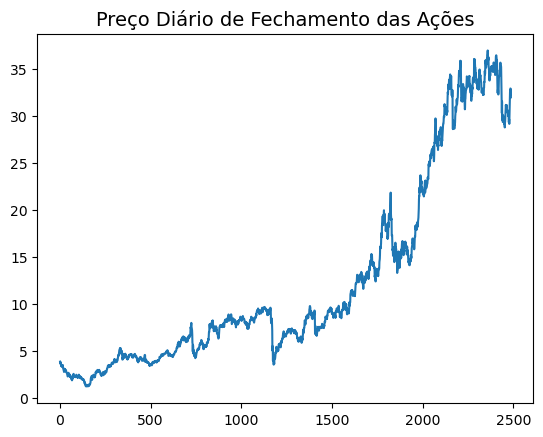

In [174]:
# Plot
plt.plot(dados["Fechamento"])
plt.title("Preço Diário de Fechamento das Ações", size = 14)
plt.show()

In [175]:
dados.head()

,Data,Abertura,Maximo,Minimo,Fechamento,Volume
0,2015-06-24 00:00:00-03:00,3.81,3.90,3.81,3.86,39613200
1,2015-06-25 00:00:00-03:00,3.86,3.86,3.65,3.68,48369000
2,2015-06-26 00:00:00-03:00,3.69,3.85,3.69,3.85,34536800
3,2015-06-29 00:00:00-03:00,3.79,3.97,3.68,3.75,63175500
4,2015-06-30 00:00:00-03:00,3.76,3.79,3.69,3.70,32876500


In [176]:
# Criando novos campos de Média Movel com 5 Dias, 14 Dias e 21 Dias
dados['mm5d'] = dados['Fechamento'].rolling(5).mean()
dados['mm14d'] = dados['Fechamento'].rolling(14).mean()
dados['mm21d'] = dados['Fechamento'].rolling(21).mean()

In [177]:
dados.head(30)

,Data,Abertura,Maximo,Minimo,Fechamento,Volume,mm5d,mm14d,mm21d
0,2015-06-24 00:00:00-03:00,3.81,3.90,3.81,3.86,39613200,NaN,NaN,NaN
1,2015-06-25 00:00:00-03:00,3.86,3.86,3.65,3.68,48369000,NaN,NaN,NaN
2,2015-06-26 00:00:00-03:00,3.69,3.85,3.69,3.85,34536800,NaN,NaN,NaN
3,2015-06-29 00:00:00-03:00,3.79,3.97,3.68,3.75,63175500,NaN,NaN,NaN
4,2015-06-30 00:00:00-03:00,3.76,3.79,3.69,3.70,32876500,3.77,NaN,NaN
5,2015-07-01 00:00:00-03:00,3.74,3.75,3.50,3.55,62627200,3.71,NaN,NaN
6,2015-07-02 00:00:00-03:00,3.60,3.66,3.55,3.60,37421500,3.69,NaN,NaN
7,2015-07-03 00:00:00-03:00,3.57,3.59,3.41,3.43,31574500,3.61,NaN,NaN
8,2015-07-06 00:00:00-03:00,3.36,3.42,3.29,3.36,51206800,3.53,NaN,NaN
9,2015-07-07 00:00:00-03:00,3.32,3.46,3.16,3.43,72452800,3.48,NaN,NaN


In [178]:
dados.dropna(inplace=True)

In [179]:
dados.shape

(2467, 9)

In [ ]:
qtd_linhas = len(dados)
qtd_linhas_treino = qtd_linhas - 400
qtd_linhas_teste = qtd_linhas - 20

qtd_linhas_validacao = qtd_linhas_treino - qtd_linhas_teste

info = (
    f"linhas treino = 0:{qtd_linhas_treino}"
    f" linhas teste = 0:{qtd_linhas_treino}:{qtd_linhas_teste}"
    f" linhas validacao = 0:{qtd_linhas_teste}:{qtd_linhas}"

)

info

'linhas treino = 0:2067 linhas teste = 0:2067:2367 linhas validacao = 0:2367:2467'

In [181]:
# Separando variaveis PREDITORAS e variavel ALVO
preditoras = dados.drop(['Data', 'Fechamento', 'Volume'], axis=1)
target = dados['Fechamento']

In [182]:
preditoras.head()

,Abertura,Maximo,Minimo,mm5d,mm14d,mm21d
20,2.98,3.08,2.95,3.12,3.32,3.45
21,2.97,2.99,2.85,3.04,3.28,3.41
22,2.91,2.92,2.77,2.96,3.24,3.36
23,2.83,2.98,2.80,2.92,3.21,3.32
24,2.92,3.14,2.89,2.94,3.19,3.29


In [183]:
preditoras.tail()

,Abertura,Maximo,Minimo,mm5d,mm14d,mm21d
2482,32.53,32.93,32.07,31.52,30.45,30.54
2483,32.38,33.09,32.37,32.10,30.63,30.63
2484,32.96,33.21,32.49,32.47,30.81,30.71
2485,32.73,33.16,32.63,32.68,31.01,30.80
2486,33.29,33.34,31.81,32.58,31.14,30.88


In [184]:
# Normalizando os dados
scaler = MinMaxScaler().fit(preditoras)
preditoras_normalizadas = scaler.transform(preditoras)

In [185]:
# Verificando a normalização realizada
print('Preditoras: ', preditoras_normalizadas.shape)
print(preditoras_normalizadas)

Preditoras:  (2467, 6)
[[0.04943365 0.05114259 0.04954172 0.05205807 0.05785327 0.06183586]
 [0.04902311 0.04845946 0.04656925 0.0497709  0.05681503 0.06055189]
 [0.04729866 0.04650806 0.04442243 0.04763289 0.05560875 0.05930415]
 ...
 [0.89298412 0.89059456 0.88528137 0.88554273 0.84933357 0.85134712]
 [0.88651208 0.88920146 0.88924263 0.89161976 0.85514105 0.85410397]
 [0.90227016 0.89421671 0.8660408  0.88860965 0.85890282 0.85629217]]


In [186]:
# Separando dados para treino e teste
X_Train = preditoras_normalizadas[:qtd_linhas_treino]
X_test = preditoras_normalizadas[qtd_linhas_treino:qtd_linhas_teste]

Y_Train = target[:qtd_linhas_treino]
Y_test = target[qtd_linhas_treino:qtd_linhas_teste]

print(len(X_Train), len(Y_Train))
print(len(X_test), len(Y_test))

2067 2067
300 300


In [187]:
# Treinamento usando regressão linear
lr = linear_model.LinearRegression()
lr.fit(X_Train, Y_Train )
predicao = lr.predict(X_test)
cd = r2_score(Y_test, predicao)

f'Coeficiente de determinação:{cd * 100:.2f}'

#Lembrete: Coeficiente de determinação determina a aproximação da linha de regressão.
# Quanto mais próximo de 1 melhor.

'Coeficiente de determinação:99.40'

In [188]:
# Treinamento usando regressão linear
rn = MLPRegressor(max_iter = 2000)
rn.fit(X_Train, Y_Train )
predicao = rn.predict(X_test)
cd = rn.score(X_test,Y_test)

f'Coeficiente de determinação:{cd * 100:.2f}'

#Lembrete: Coeficiente de determinação determina a aproximação da linha de regressão.
# Quanto mais próximo de 1 melhor.

'Coeficiente de determinação:90.04'

In [189]:
# Executando a previsão
previsao = preditoras_normalizadas[qtd_linhas_teste:qtd_linhas]
data_pregao_full = dados['Data']
data_pregao = data_pregao_full[qtd_linhas_teste:qtd_linhas]

res_full = dados['Fechamento']
res = res_full[qtd_linhas_teste:qtd_linhas]

pred = lr.predict(previsao)

df = pd.DataFrame({'Data_Pregão':data_pregao, 'Real': res, 'Previsão':pred})

df.set_index('Data_Pregão', inplace = True)

df

,Real,Previsão
Data_Pregão,,
2025-01-27 00:00:00-03:00,35.22,35.15
2025-01-28 00:00:00-03:00,35.17,35.11
2025-01-29 00:00:00-03:00,34.96,35.02
2025-01-30 00:00:00-03:00,35.42,35.29
2025-01-31 00:00:00-03:00,35.70,36.07
...,...,...
2025-06-16 00:00:00-03:00,32.21,32.49
2025-06-17 00:00:00-03:00,32.94,32.99
2025-06-18 00:00:00-03:00,32.91,32.83


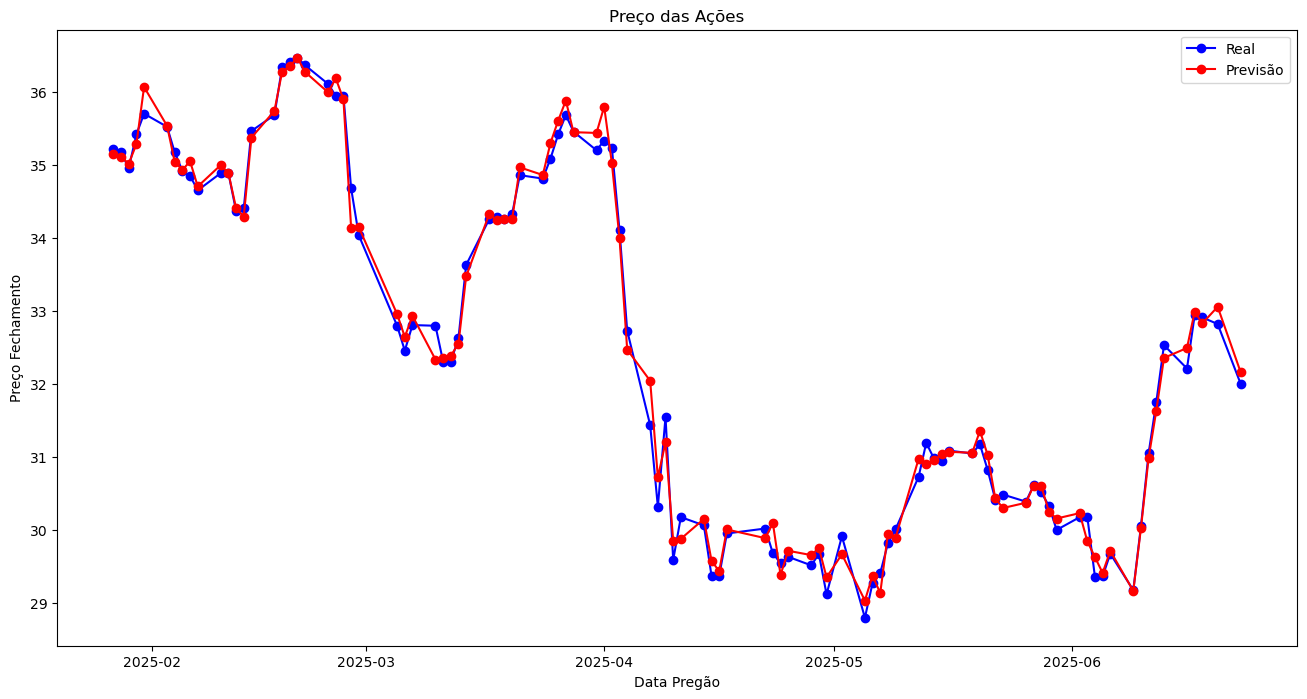

In [190]:
# Gerando o Gráfico
plt.figure(figsize = (16,8))
plt.title('Preço das Ações')
plt.plot(df['Real'], label = 'Real', color = 'blue', marker = 'o')
plt.plot(df['Previsão'], label = 'Previsão', color = 'red', marker = 'o')
plt.xlabel('Data Pregão')
plt.ylabel('Preço Fechamento')
leg = plt.legend()